In [4]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
import string
from nltk.corpus import stopwords

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Kannan
[nltk_data]     T\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
messages = pd.read_csv('C:/Users/Kannan T/Documents/DATA SET/twitter_training.csv',names = ['id','borderland','label','message'])

In [22]:
messages.head()

,id,borderland,label,message
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [23]:
messages.drop(columns = ['id','borderland'],inplace = True,axis = 1)

In [24]:
messages.head()

,label,message
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [25]:
messages.groupby('label').describe()

message                                                            \
             count unique                                                top   
label                                                                          
Irrelevant   12875  12284                                                      
Negative     22358  21237                                                      
Neutral      18108  17110  At the same time, despite the fact that there ...   
Positive     20655  19138                                                Wow   

                 
           freq  
label            
Irrelevant   33  
Negative     46  
Neutral      57  
Positive     48

In [35]:
messages.shape

(74682, 2)

In [32]:
messages.isnull().sum()

label        0
message    686
dtype: int64

In [41]:
messages.dropna(inplace = True)

In [42]:
messages.isnull().sum()

label      0
message    0
dtype: int64

In [43]:
messages['length'] = messages['message'].apply(len)

In [44]:
messages.head()

,label,message,length
0,Positive,im getting on borderlands and i will murder yo...,53
1,Positive,I am coming to the borders and I will kill you...,51
2,Positive,im getting on borderlands and i will kill you ...,50
3,Positive,im coming on borderlands and i will murder you...,51
4,Positive,im getting on borderlands 2 and i will murder ...,57


<Axes: ylabel='Frequency'>

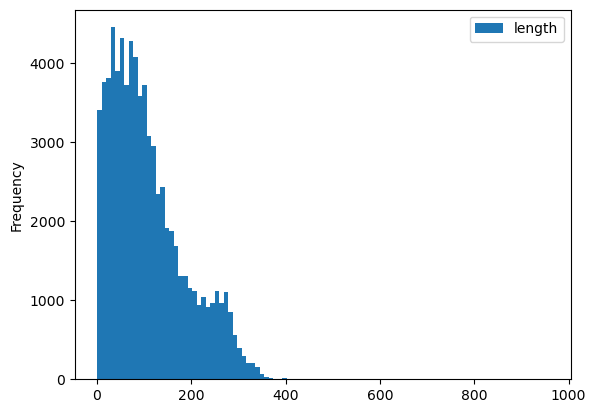

In [45]:
messages.plot.hist(bins = 100)

array([[<Axes: title={'center': 'Irrelevant'}>,
        <Axes: title={'center': 'Negative'}>],
       [<Axes: title={'center': 'Neutral'}>,
        <Axes: title={'center': 'Positive'}>]], dtype=object)

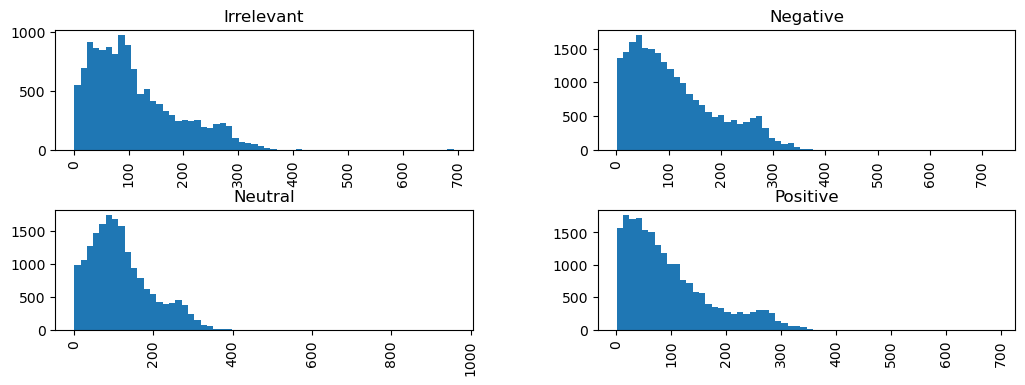

In [47]:
messages.hist(column = 'length', by = 'label',bins = 60,figsize = (12,4))

In [57]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [62]:
def text_process(message):
    nonpunct = [char for char in message if char not in string.punctuation]
    nonpunct = ''.join(nonpunct)
    return[word for word in nonpunct.split() if word not in stop_words]

In [63]:
messages['message'].head().apply(text_process)

0       [im, getting, borderlands, murder]
1            [I, coming, borders, I, kill]
2         [im, getting, borderlands, kill]
3        [im, coming, borderlands, murder]
4    [im, getting, borderlands, 2, murder]
Name: message, dtype: object

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [69]:
len(bow_transformer.vocabulary_) #gives the total number pf unique words identified accross the documents

51495

In [77]:
messages_bow = bow_transformer.transform(messages['message'])

In [78]:
messages_bow.shape

(73996, 51495)

In [79]:
messages_bow.nnz

866767

In [80]:
from sklearn.feature_extraction.text import TfidfTransformer

In [81]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [82]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [85]:
from sklearn.naive_bayes import MultinomialNB

In [86]:
sentiment_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [87]:
all_pred = sentiment_model.predict(messages_tfidf)

In [88]:
all_pred

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Negative'], dtype='<U10')

In [90]:
messages_test = pd.read_csv('C:/Users/Kannan T/Documents/DATA SET/twitter_validation.csv',names = ['id','borderland','label','message'])

In [91]:
messages_test.drop(columns = ['id','borderland'],inplace = True,axis = 1)

In [94]:
msg_train, msg_test,label_train,label_test = [messages['message'], messages_test['message'],messages['label'],messages_test['label']]

In [96]:
from sklearn.pipeline import Pipeline

In [97]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [98]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001CABBB28720>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [101]:
predictions = pipeline.predict(msg_test)

In [100]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.66      0.79       172
    Negative       0.72      0.94      0.81       266
     Neutral       0.95      0.71      0.81       285
    Positive       0.79      0.94      0.86       277

    accuracy                           0.82      1000
   macro avg       0.86      0.81      0.82      1000
weighted avg       0.85      0.82      0.82      1000

